In [169]:
import os
import settings
import pandas as pd
import numpy as np
import operator
import graphviz
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeRegressor

In [224]:
def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

def sort_important_features(df):
    dt = DecisionTreeRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = dt.fit(df[predictors], df[settings.TARGET])
    predictions = dt.predict(df[predictors])
    results = {name: score for name, score in zip(predictors, dt.feature_importances_)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = dt.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    return model

In [225]:
df = read_data()

In [226]:
model = sort_important_features(df)

feature: space, importance: 0.2005050984682565
feature: ppron, importance: 0.0629210106258823
feature: ipron, importance: 0.038373698392109655
feature: assent, importance: 0.02855028687712561
feature: power, importance: 0.02568938060304212
feature: relig, importance: 0.021585980057001172
feature: i, importance: 0.0207705234013081
feature: you, importance: 0.019871369129593187
feature: sad_2q, importance: 0.01863776062559022
feature: affect_1h, importance: 0.0174085699188831
feature: work, importance: 0.016805818559716
feature: shehe, importance: 0.015459456701531838
feature: anger_2h, importance: 0.014969941756973595
feature: prep, importance: 0.014512594490959863
feature: time, importance: 0.014214846101157308
feature: achieve, importance: 0.012862911779683945
feature: tentat, importance: 0.012763308214546448
feature: risk, importance: 0.011237389865583007
feature: reward, importance: 0.010787415678996007
feature: WPS, importance: 0.010724296071407954
feature: drives, importance: 0.01

In [173]:
def print_tree(model):
    predictors = df.columns.tolist()
    features = [p for p in predictors if p not in settings.NON_PREDICTORS]
    data = export_graphviz(model, out_file=None, feature_names=features)
    graph = graphviz.Source(data)
    graph.render(view=True)

In [ ]:
print_tree(model)

## Random Forest

In [239]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

def sort_important_features(df):
    rf = RandomForestRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = rf.fit(df[predictors], df[settings.TARGET])
    predictions = rf.predict(df[predictors])
    importances = rf.feature_importances_
    
    results = {name: score for name, score in zip(predictors, importances)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = rf.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    names = [k[0] for k in sorted_results]
    return model, importances, names

def plot_feature_importances(df, importances, names):
    reversed_names = names[::-1]
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    features = predictors
    indices = np.argsort(importances)
    predictors = np.array(predictors)
    
    
    plt.figure(figsize=(30,30))
    matplotlib.rcParams.update({'font.size': 16})
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')

    plt.yticks(range(len(indices)),reversed_names)
    plt.xlabel('Relative Importance')
    plt.show()

In [240]:
rf, importances, names = sort_important_features(df)

feature: ppron, importance: 0.07598183091730784
feature: IngroupVice, importance: 0.042644442258326073
feature: pronoun, importance: 0.03937138121864946
feature: work, importance: 0.03902490393789319
feature: space, importance: 0.037911127222147116
feature: sad_2q, importance: 0.03441545881870845
feature: assent, importance: 0.031091681498831052
feature: i, importance: 0.028890463466931866
feature: relig, importance: 0.026564116266197212
feature: posemo_2q, importance: 0.020633338160159092
feature: power, importance: 0.018997666788348636
feature: leisure, importance: 0.018704077266900026
feature: achieve, importance: 0.01411968719476447
feature: tentat, importance: 0.012619686286761597
feature: money, importance: 0.010843088208764446
feature: number, importance: 0.010763904384105615
feature: article, importance: 0.01073917751080446
feature: shehe, importance: 0.01048178952851926
feature: informal, importance: 0.009637919767156996
feature: adverb, importance: 0.00946589844187427
feature

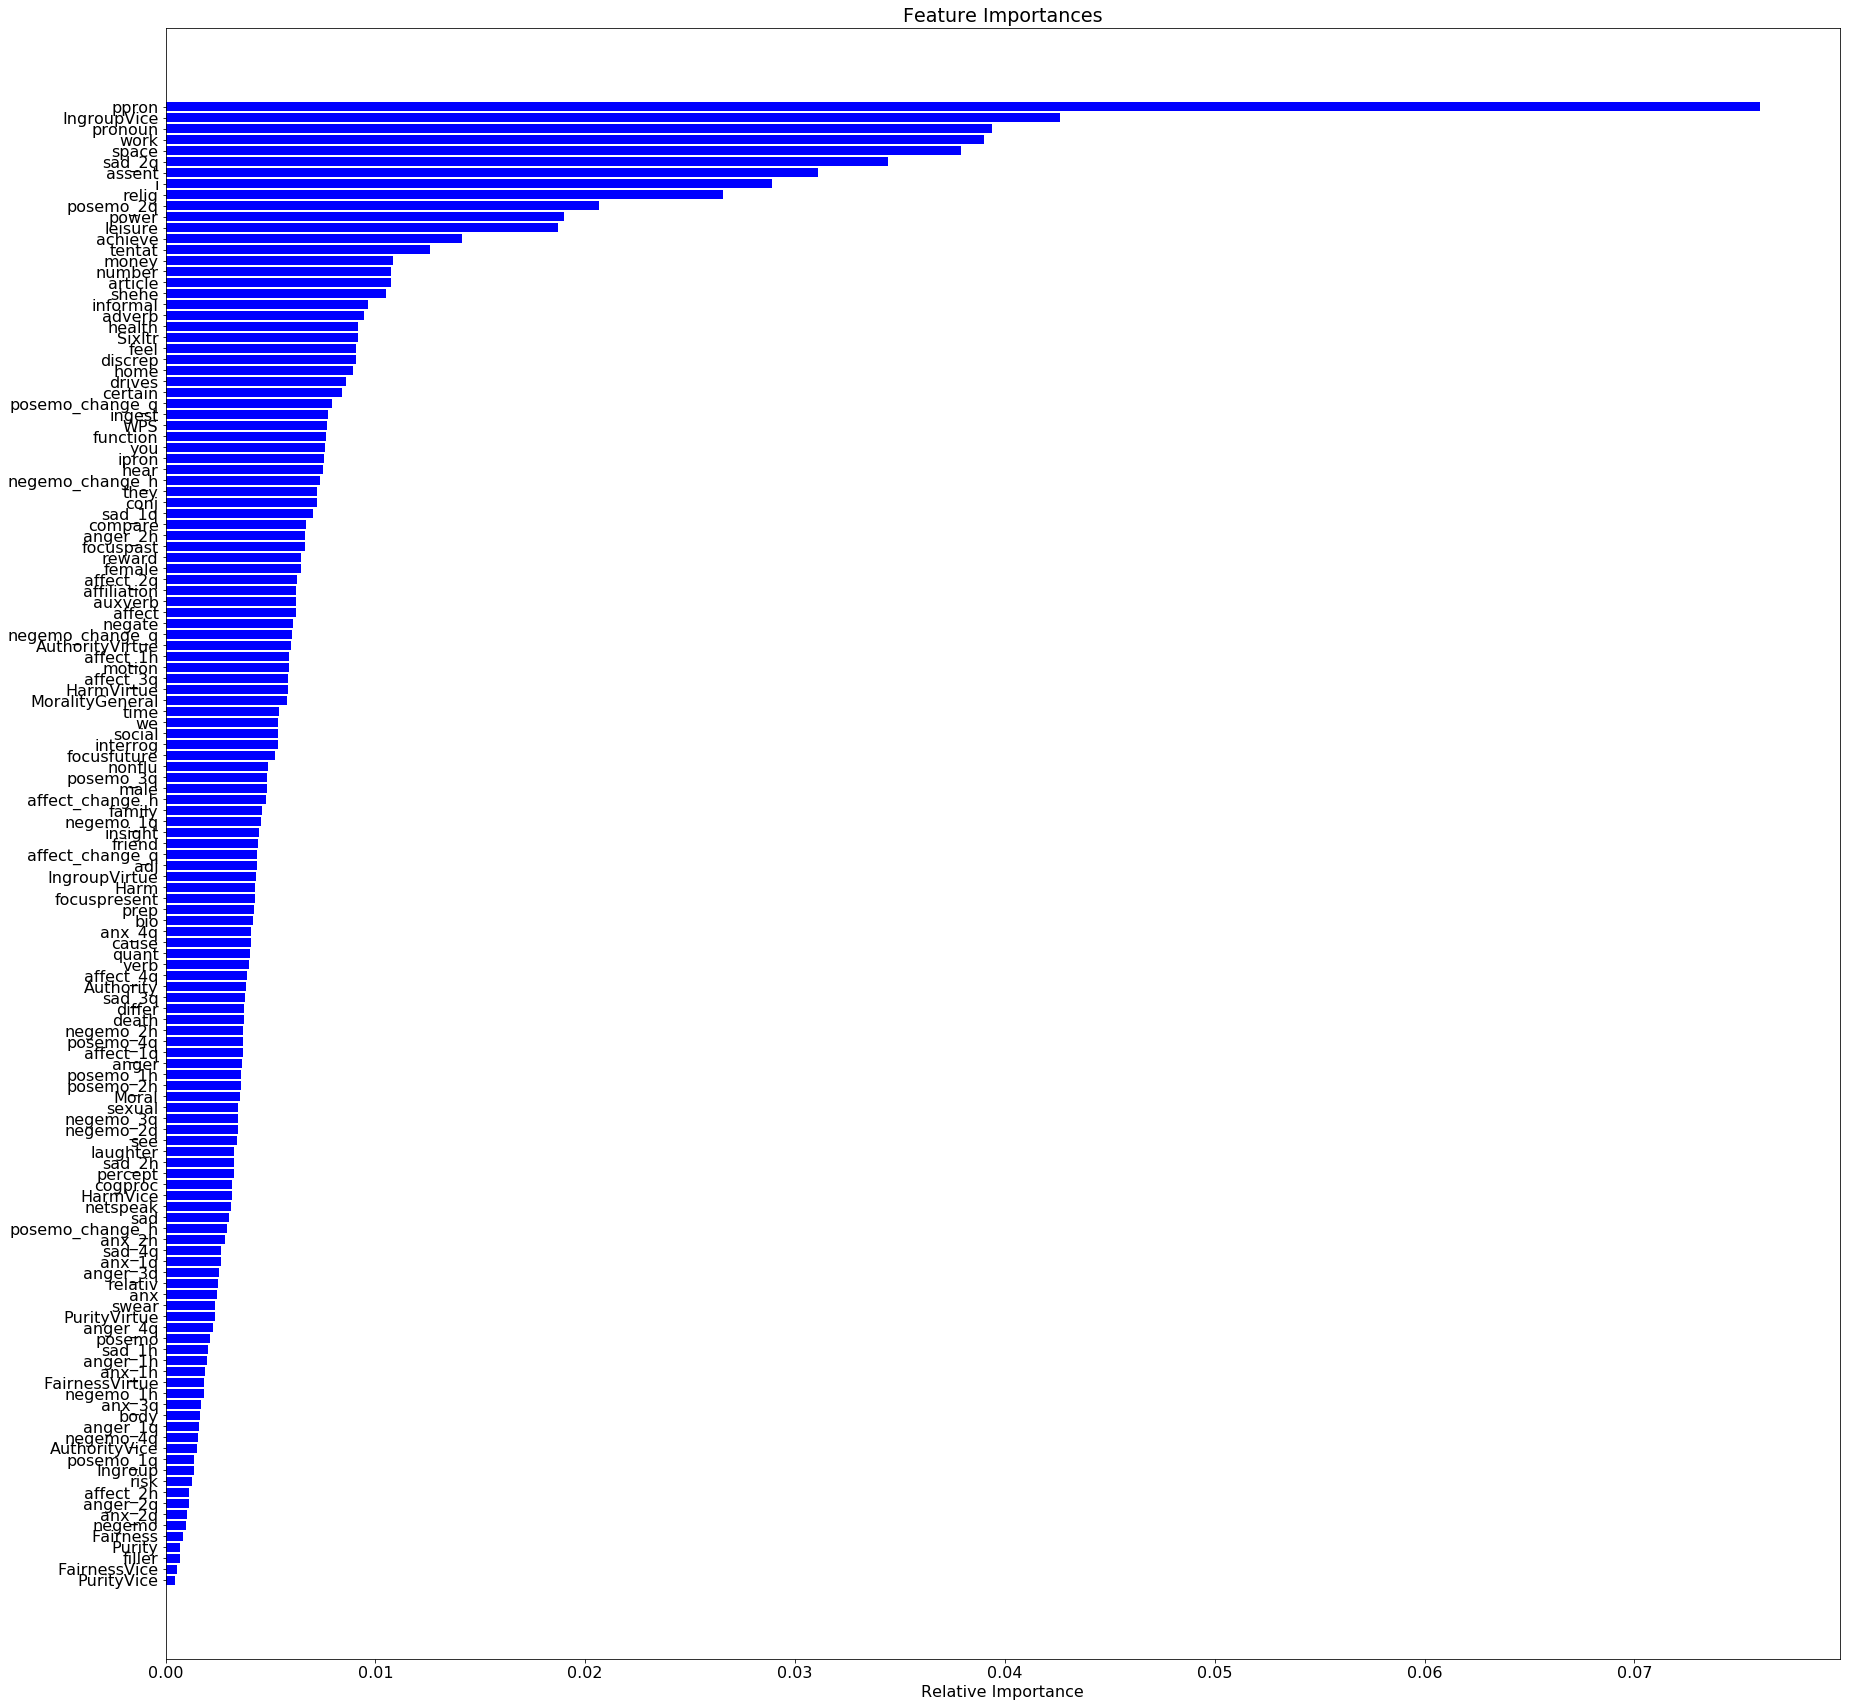

In [241]:

plot_feature_importances(df, importances, names)

## Create Linear Model Using Features with High Importance

In [ ]:
import os
import settings
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

In [286]:
def create_summary(df):
    lr = LinearRegression()
    predictors = df.columns.tolist()
    predictors = ['assent','IngroupVice','we','i','social','focuspast','sad_2q','relig','achieve','power']
    lr.fit(df[predictors], df['norm_inspiring'])

    X = df[predictors]
    X2 = sm.add_constant(X)
    est = sm.OLS(df['norm_inspiring'], X2)
    est2 = est.fit()
    print(est2.summary())

In [287]:
df = read_data()
create_summary(df)

                            OLS Regression Results                            
Dep. Variable:         norm_inspiring   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     31.72
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           2.46e-63
Time:                        21:49:58   Log-Likelihood:                -16764.
No. Observations:                2406   AIC:                         3.355e+04
Df Residuals:                    2394   BIC:                         3.362e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -85.0804     26.574     